In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as spi

from IPython.display import HTML
from scipy.integrate import quad

from mesh import  make_uniform_mesh_1
from mesh import  make_uniform_mesh
import heat_1D
import barenblatt_solution 

from darcy_1D import solve

## Diffusion non-linéaire

In [4]:
L= 4
t0 = 0
tf = .2
M =4
n=1

N=500
dx = L/N
dt = tf/200
theta = 1
umesh = make_uniform_mesh_1(L, N)
x = umesh.centres

In [6]:
def solex1(x, t):
    return (M/(np.sqrt(4*np.pi*t)))*np.exp(-((x**2)/(4*t)))

In [8]:
test = 1
if test==1:
    m=1
    Kfun = lambda u: u **(m-1) 
    initfunc = lambda x:1e-6*np.ones_like(x)
    uinit = initfunc(x)
    uinit[N//2] = M/dx
    bcleft = {'type': 'Dirichlet', 'value': lambda t: 0.02}
    bcright = {'type': 'Dirichlet', 'value': lambda t:0.02}
    bcs = [bcleft, bcright]

def rhsfunc(x,t):
    return lambda x: np.zeros_like(x)
rhsf= lambda t: rhsfunc(x,t)


ts, u = heat_1D.time_loop(umesh, Kfun, bcs, rhsf, t0, tf, dt, theta, uinit, lineaire=False)



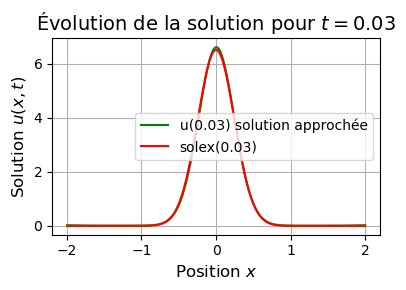

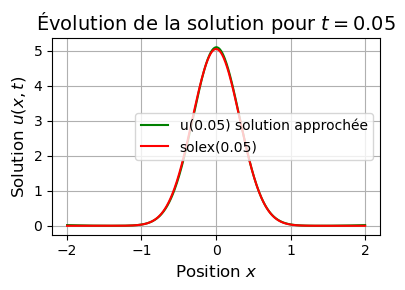

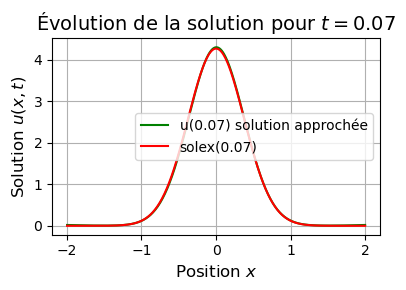

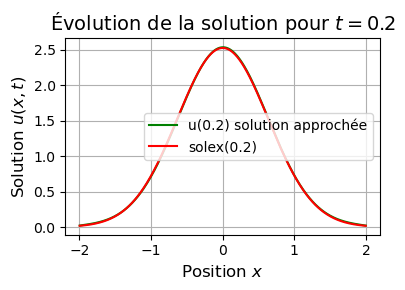

In [9]:
for t in [0.03 ,  0.05 , 0.07 ,0.2]:
    t_index = int(t / dt)
    plt.figure(figsize=(4, 3))
    plt.plot(x, u[t_index], 'g' , label=f'u({t}) solution approchée')  # Utiliser t_index au lieu de t
    # Tracer les solutions analytiques pour solex
    plt.plot(x, solex1(x, t), 'r' ,  label=f'solex({t})')
    
    
    plt.xlabel('Position $x$', fontsize=12)
    plt.ylabel('Solution $u(x, t)$', fontsize=12)
    plt.title(f'Évolution de la solution pour $t = {t}$', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [18]:
L=5
t0 = 0
tf = .2
M = 4
n=1

N=700
dx = L/N
dt = tf/400
theta = 1
umesh = make_uniform_mesh_1(L, N)
x = umesh.centres

In [20]:
test =1
if test==1:
    m =2;
    Kfun = lambda u: u **(m-1) 
    initfunc = lambda x:1e-5*np.ones_like(x)
    uinit = initfunc(x)
    uinit[N//2] = M/dx
    bcleft = {'type': 'Dirichlet', 'value': lambda t: 0.002}
    bcright = {'type': 'Dirichlet', 'value': lambda t: 0.002}
    bcs = [bcleft, bcright]
def rhsfunc(x,t):
    return lambda x: np.zeros_like(x)
rhsf= lambda t: rhsfunc(x,t)


ts, u = heat_1D.time_loop(umesh, Kfun, bcs, rhsf, t0, tf, dt, theta, uinit, lineaire=False)


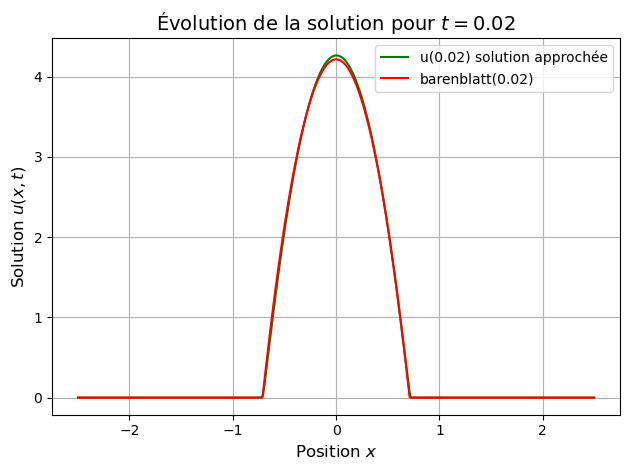

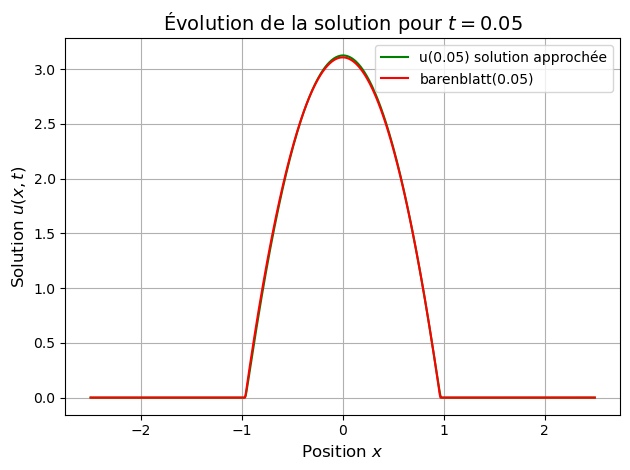

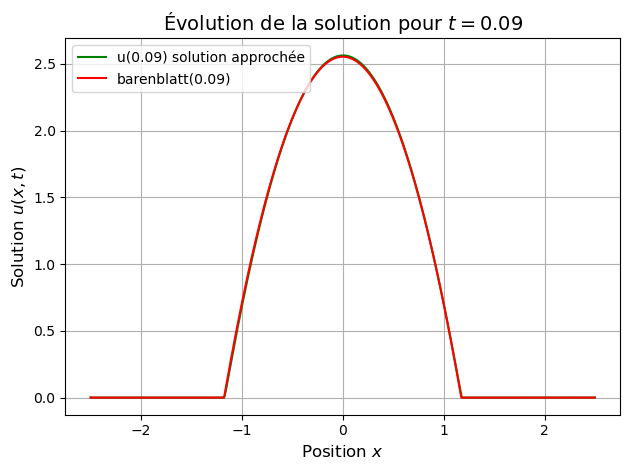

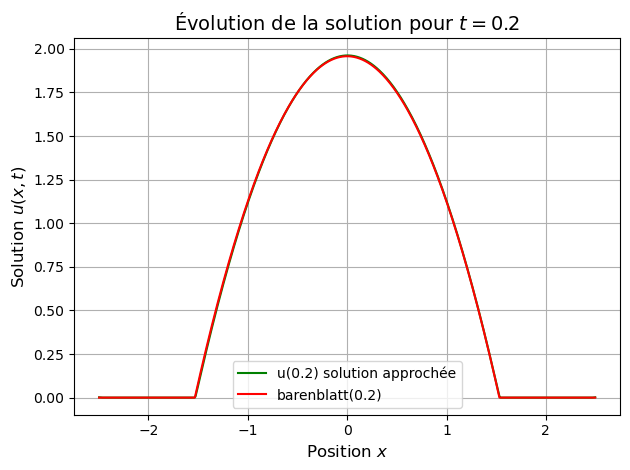

In [21]:
for t in [0.02 , 0.05 , 0.09 ,0.2]:
    t_index = int(t / dt)
    #plt.figure(figsize=(4,3))
    plt.plot(x, u[t_index], 'g' , label=f'u({t}) solution approchée')  # Utiliser t_index au lieu de t
    # Tracer les solutions analytiques pour solex
    plt.plot(x, barenblatt_solution.barenblatt(m, n, M, x, t), 'r' ,  label=f'barenblatt({t})')
    
    
    plt.xlabel('Position $x$', fontsize=12)
    plt.ylabel('Solution $u(x, t)$', fontsize=12)
    plt.title(f'Évolution de la solution pour $t = {t}$', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    